---------------------------------------------------
<h1>TELCO CHURN ANALYSIS</h1>
  <h6> by David Berchelmann -- March 9, 2021 </h6>
  
  ------------------------------------------------



<img src="https://www.sdxcentral.com/wp-content/uploads/2019/10/Fallacy-of-Telco-Cloud-Image.jpg" width="750" height="50" />

-------

<h1><font color = green> Goals For This Project</font> </h1>

- Acquire the telco data set
- Clean & Prep the data for exploration & modeling
- Identify drivers of churn
- Apply a supervised machine learning classification model to the test data set

------

<h1><font color = green> Executive Summary</font> </h1>

------

<h4><b>The Problem</b></h4>

- What are customer churning?

<h4><b>The Goal</b></h4>

- Identify drivers of churn and create a model to help predict churn

<h4><b>The Process</b></h4>

  * Acquire the Data
  * Prepare 
  * Explore 
  * Model
  * Create Recommendations Based On Findings 
  
<h4><b>The Findings</b></h4>

- There are multiple drivers of churn:
    - single with no dependents
    - use fiber optic internet
    - on a monthly contract
    - pay with electronic check
    
- Our random forest model correclty predicts churn 79% of the time beating the baseline established of 73.5%
    
    
 
-------

<h3><u>Show Me The Stats:</u></h3>

- <font color = red>The baseline accuracy is 73.0%</font>
----------
- <b>Logistic Regression Train Accuracy</b> --- 77.88%

- <font color = blue>Decision Tree Train Accuracy</font> --- 81.46%

- <b>Random Forest Train Accuracy</b> --- 78.01%

- <font color = blue>KNN Accuracy Train Accuracy</font> --- 72.86%

-------

- <b>Logistic Regression Validate Accuracy</b> --- 78.89%

- <font color = blue>Decision Tree Validate Accuracy</font> --- 79.42%

- <b>Random Forest Validate Accuracy</b> --- 78.65%

- <font color = blue>KNN Validate Accuracy </font> --- 72.92%

-----------------

<h4>Let's import some libraries to get started</h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from graphviz import Graph
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



------
<h3>Time to Acquire the Data</h3>

-----

In [2]:
from acquire import get_connection, new_telco_data, get_telco_data

In [3]:
df = get_telco_data()

-------
<h5> Now that we have the data, let's analyze it so we know what we are working with and see what we will need to do to prepare it properly.</h5>

- <b>We will look at the following:</b>
    * To make sure the data was imported properly, we will look at the first few rows
    * The shape (Number of Rows, Number of Columns)
    * Information regarding data types and if we are missing data
    * We will describe the dataset (quick snapshot showing stats on columns w/ numeric data types)
    * Finally we will plot a few histograms to get a look at the distribution of some of our variables

-------

 <b>Let's look at the first couple rows</b>
 - We want to make sure the data has been imported correctly
 
 -----

In [4]:

df.head(2)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
1,4,1,1,0013-MHZWF,Female,0,No,Yes,9,Yes,...,Yes,Yes,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic)


 ------
 
 <b>Let's analyze the shape to see how many rows and columns</b>
 - We have 7043 rows and 24 columns
 
 -----

In [5]:

df.shape

(7043, 24)

------

<b>Now we will look at the data types and determine if missing values appears</b>
- There are no apparent missing values but total charges is labeled as an object when it should be a numeric type. This will be addressed in the prepartion stage and this process will be done again to look for missing values.

-----

In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

------

<b>Let's describe the dataset and get a look at values across our variables with numeric data types</b>


------

In [7]:

df[['monthly_charges', 'tenure']].describe().T

,count,mean,std,min,25%,50%,75%,max
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00


<b>I'm curious to some of our data distributions, let look at some histogram plots</b>

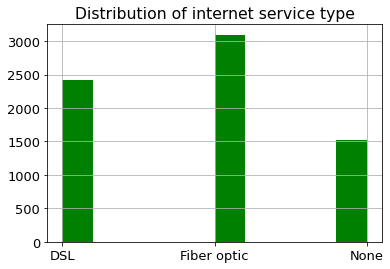

In [8]:


df['internet_service_type'].hist(color='green', figsize=(6,4))

plt.title('Distribution of internet service type')
plt.show()

-----

<h4>Takeaway</h4>
- Majority of customers have fiber optic internet

----

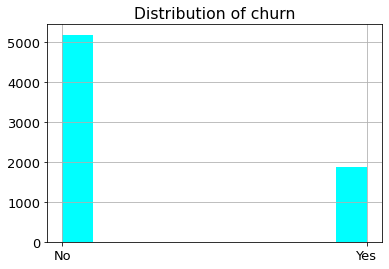

In [9]:
df['churn'].hist(color='cyan', figsize=(6,4))

plt.title('Distribution of churn')
plt.show()

-----

<h4>Takeaway</h4>
- Total customer that have churn out of 7043 is right under 2000 people

----

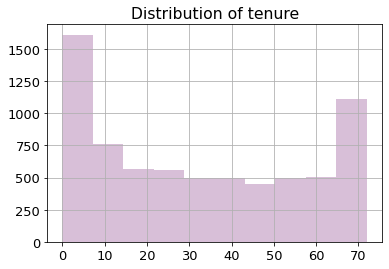

In [10]:
df['tenure'].hist(color='thistle', figsize=(6,4))

plt.title('Distribution of tenure')
plt.show()

-----

<h4>Takeaway</h4>
- A large number of customer only stayed with the company for 5 months. This is takeaway to explore deeper

------

<h3>Let's Prepare the Data</h3>

-----

In [11]:
from prepare import clean_telco, train_validate_test_split

In [12]:
df = clean_telco(df)


<h4><font color = green>Immediate Prep Analysis:</font></h4>

-------

 - The <b>total_charges</b> column had a data type of 'object' and needed to be transitioned to a float(numeric data type).
 
     - After this was completed, it was found there were 11 NaN values in this column (the only missing values in the entirety of the data-set)
     
         - Further analysis showed the reason for this was that these 11 customers were in month '0' (brand new customers) and so they had no value for total charges as they hadn't compelted an entire month of service
         
              - To fix this, it was decided to fill those missing values with 0.
             
                   - These features of these customers did not appear to be drivers of churn and would not affect the modeling.
-------

- The next issue was combining like columns (this was done within the clean_telco function:
    - Combined columns now consists of:
    
      <font color = blue> - Partner & Dependents </font> --  <i>new column name</i> = <b> no_partner_depend</b>
        
       <font color = blue> - Phone_service & Multiple_lines</font> -- <i>new column name</i>  = <b> phone_lines</b>
        
        <font color = blue>- Streaming_tv & Streaming_movies</font> -- <i>new column name</i>  = <b> stream_tv_mov</b>
        
        <font color = blue>- Online_security & Online_backup </font> -- <i>new column name</i>  = <b> online_sec_bkup</b>
------

<h4><font color = green> Other Actions Taken During Prep</font></h4>

-------

- Created a new column called <b>average_charges</b> that is derived by total_charges/tenure

- Also set up a <b>tenure_in_years</b> column to show a difference from just total months

- Renamed most columns to allow for easier readability

- Encoded the four newly formed combo columns from boolean values to a '1' '0' format. 1 = True, 0 = False

- Created dummy columns of all categorical columns to allow for upcoming data exploration

- Created 'enconded_churn' column by changing Yes/No to '1' '0' format. 1 = Yes <i>churned</i> 0 = No <i> not churned</i>

- Finally, I dropped the the first 3 columns that deal with contract_type_id, internet_servoce_id, & payment_type_id. I used their specific columns found later in the data set and created encoded dummy variables.

------

<font color = green><h4> Here is the clean/prepped data</h4></font>

----

In [13]:
df.head()

,customer_id,senior_citizen,tenure_in_months,monthly_charges,total_charges,churn,average_charges,tenure_in_years,encoded_churn,no_partner_depend,...,monthly_contract,one_yr_contract,two_yr_contract,has_dsl,has_fiber_optic,no_internet,pmt_bank transfer,pmt_cc,pmt_electronic_check,pmt_mailed_check
0,0003-MKNFE,0,9,59.9,542.40,No,60.27,0.75,0,1,...,1,0,0,1,0,0,0,0,0,1
1,0013-MHZWF,0,9,69.4,571.45,No,63.49,0.75,0,0,...,1,0,0,1,0,0,0,1,0,0
2,0015-UOCOJ,1,7,48.2,340.35,No,48.62,0.58,0,1,...,1,0,0,1,0,0,0,0,1,0
3,0023-HGHWL,1,1,25.1,25.10,Yes,25.10,0.08,1,1,...,1,0,0,1,0,0,0,0,1,0
4,0032-PGELS,0,1,30.5,30.50,Yes,30.50,0.08,1,0,...,1,0,0,1,0,0,1,0,0,0


------

<b>Let's take a look at the data types now that the set has been cleaned</b>

- The data types have been converted to most numberic type and can now be used in our exploration & modeling

- When we run the .info process on the data frame below, we see that the total_charges column has been convereted into a numeric data type and can be used.

- Of note is that the total_charges column had 11 missing values
    - This was due to these customers being brand new and not having a full month completed. These values were filled with 0.
    - Theses customers also didn't posses drivers of churn we were looking at. All were on 1 or 2 year contracts and either had no internet or DSL.

-------

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   senior_citizen            7043 non-null   int64  
 2   tenure_in_months          7043 non-null   int64  
 3   monthly_charges           7043 non-null   float64
 4   total_charges             7043 non-null   float64
 5   churn                     7043 non-null   object 
 6   average_charges           7043 non-null   float64
 7   tenure_in_years           7043 non-null   float64
 8   encoded_churn             7043 non-null   int64  
 9   no_partner_depend         7043 non-null   int64  
 10  phone_lines               7043 non-null   int64  
 11  stream_tv_mov             7043 non-null   int64  
 12  online_sec_bkup           7043 non-null   int64  
 13  female                    7043 non-null   uint8  
 14  male    

-----

<h5>As we prepare to explore, let's important our functions and make sure to put our data through our train, validate, test function.</h5>

-------

In [15]:
import explore

plt.rcParams['figure.figsize'] = (8, 6)

In [16]:
train, validate, test = train_validate_test_split(df, seed=123)

In [17]:
train = train.drop(columns='customer_id')
validate = validate.drop(columns='customer_id')
test = test.drop(columns='customer_id')



-------

<h5>It's good practice to check the shape of your datasets to make sure your train/validate/test function split the data at it should. we are good to go. </h5>

-------

In [18]:
print(train.shape, validate.shape, test.shape)

(3943, 36) (1691, 36) (1409, 36)


-------

<h3>We Are Now Ready to Explore & Analyze</h3>

------

As we explore the data, we will take a look at the relationships between features and those who have churned.  Let's establish a churn rate.

------

Text(0.5, 0, 'Churn')

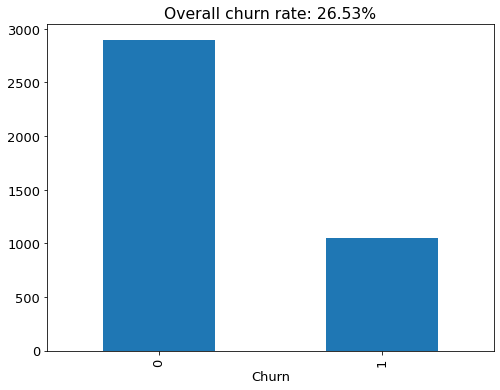

In [19]:
train.encoded_churn.value_counts().sort_index().plot.bar()
churn_rate = train.encoded_churn.mean()
plt.title(f"Overall churn rate: {churn_rate:.2%}")
plt.xlabel('Churn')

<b>Let's analyze when people who churn tend to drop off</b>

<AxesSubplot:xlabel='tenure_in_months', ylabel='Count'>

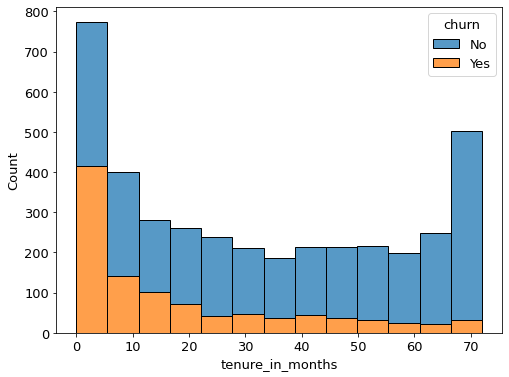

In [20]:
sns.histplot(data=train, x="tenure_in_months", hue = "churn", multiple="stack")

<b>Takeaway: </b> It appears that many people are leaving at around 5 months 

----

<h3>Univariate Charts</h3>

- We will explore single categorical variables against a quanitative variable to see how the split of the customer database plays out for each respective feature ('column' of data).
--------

In [21]:
cat_vars = ['churn', 'stream_tv_mov', 'has_fiber_optic', 'pmt_electronic_check', 'no_partner_depend', 'monthly_contract']
quant_vars = ['monthly_charges', 'total_charges']

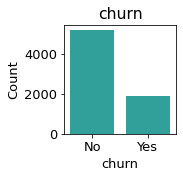

    churn  Count  Percent
No     No   5174    73.46
Yes   Yes   1869    26.54
_________________________________________________________________


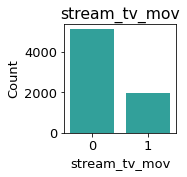

   stream_tv_mov  Count  Percent
0              0   5103    72.45
1              1   1940    27.55
_________________________________________________________________


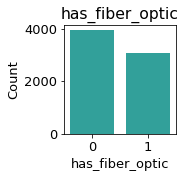

   has_fiber_optic  Count  Percent
0                0   3947    56.04
1                1   3096    43.96
_________________________________________________________________


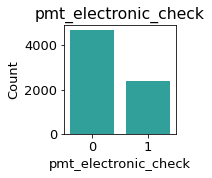

   pmt_electronic_check  Count  Percent
0                     0   4678    66.42
1                     1   2365    33.58
_________________________________________________________________


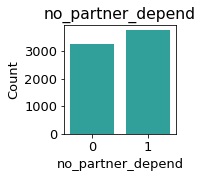

   no_partner_depend  Count  Percent
0                  1   3763    53.43
1                  0   3280    46.57
_________________________________________________________________


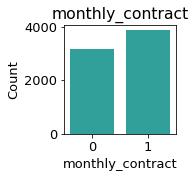

   monthly_contract  Count  Percent
1                 1   3875    55.02
0                 0   3168    44.98
_________________________________________________________________


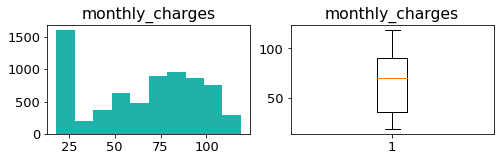

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthly_charges, dtype: float64


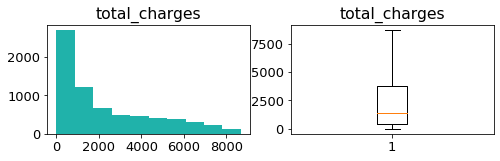

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: total_charges, dtype: float64


In [22]:
explore.explore_univariate(df, cat_vars, quant_vars)

------

<h4>Takeaways</h4>

- The univariate charts above confirmed my suspicions that peopel are churning more often when are on monthly contracts, have fiber optic internet, pay with electronic check, are without a partner and/or dependents.

- One item that stood out was that churn was low for those who have streaming video service

-------

Text(0, 0.5, 'Average Charges')

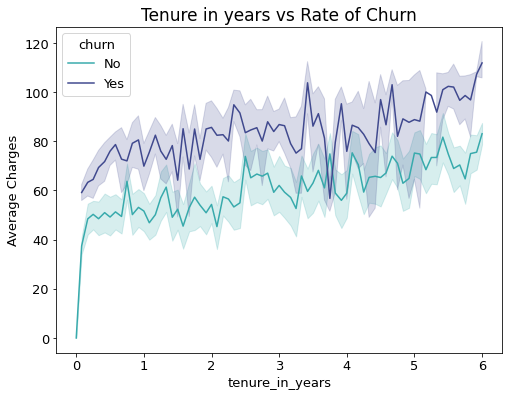

In [23]:
plt.figure('figure', figsize=(8, 6))
plt.title("Tenure in years vs Rate of Churn", fontsize=17)
ax = sns.lineplot(x="tenure_in_years", y="average_charges", data=train, hue='churn', palette=sns.color_palette("mako_r", 2))
plt.ylabel('Average Charges')

------

<h4>Takeaways</h4>

- The line plot shows that those who churn have a higher average monthly bill than those who don't churn.

-----


<font color = 'green'><h3>Let's analyze a few swarm plots</h3></font>

-----

<h4>Here, we can analyze the distribution of those who churned and didn't churn based on how long they were/are a customer and what service they had.</h4>

- <font color = 'orange'><b>Orange</b></font> dots mean the customer has churned. 

- <font color = 'green'><b>Green</b></font> dots means the customer is still active.

- <b>'1'</b> on the x-axis means <b>'Yes'</b>, <b>'0'</b> means <b>'No'</b>

Text(0.5, 1.0, 'Monthly Tenure & Online Security/Backup')

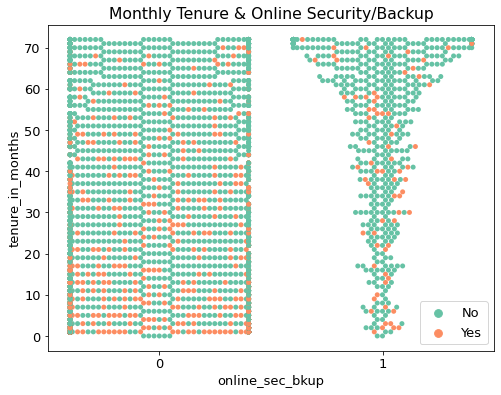

In [24]:
sns.swarmplot(x="online_sec_bkup", y="tenure_in_months", data=train, hue="churn", palette="Set2")
plt.legend()
plt.title('Monthly Tenure & Online Security/Backup')

------

<h4>Takeaways</h4>

- The swam plot shows that there doesn't appear to be a relationship to tenure with those have it and churned.

-----


Text(0.5, 1.0, 'Monthly Tenure & Not Having A Partner & Dependent')

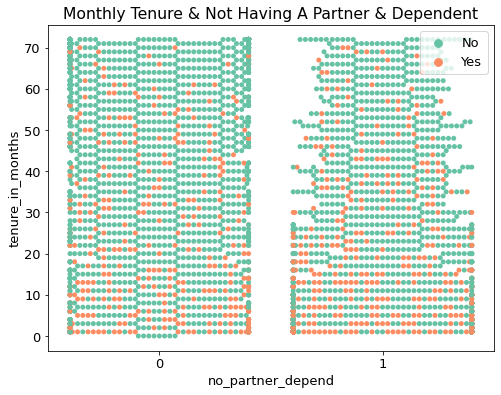

In [25]:
sns.swarmplot(x="no_partner_depend", y="tenure_in_months", data=train, hue="churn", palette="Set2")
plt.legend()
plt.title('Monthly Tenure & Not Having A Partner & Dependent')

------

<h4>Takeaways</h4>

- A majority of customer who identify as having no partner and no dependent churned within 20 months.

-----


Text(0.5, 1.0, 'Monthly Tenure & Fiber Optic Internet')

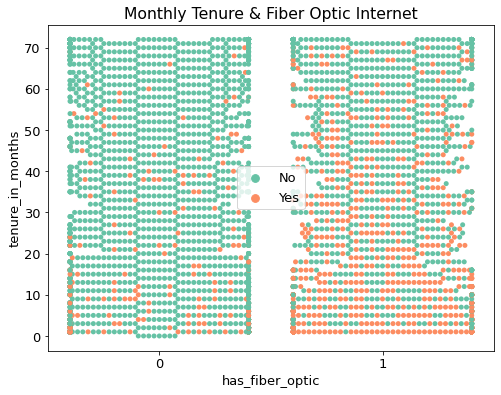

In [26]:
sns.swarmplot(x="has_fiber_optic", y="tenure_in_months", data=train, hue="churn", palette="Set2")
plt.legend()
plt.title('Monthly Tenure & Fiber Optic Internet')

------

<h4>Takeaways</h4>

- This swarm plot is showing there is a possible strong relationship between those who have churned under 20 months and have fiber optic internet.

-----


Text(0.5, 1.0, 'Monthly Tenure & Payment with Electronic Check')

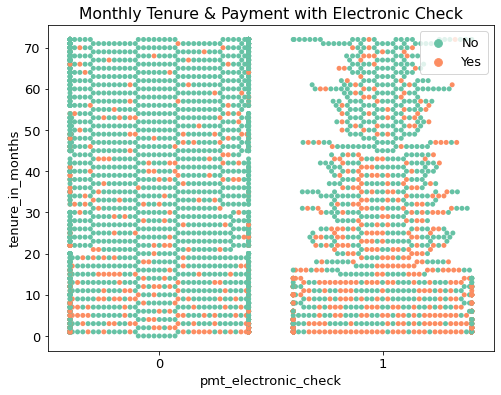

In [27]:
sns.swarmplot(x="pmt_electronic_check", y="tenure_in_months", data=train, hue="churn", palette="Set2")
plt.legend()
plt.title('Monthly Tenure & Payment with Electronic Check')

------

<h4>Takeaways</h4>

- Payment with electronic check is popular among those who churn within in 20 months. This should be investigated further.

-----


Text(0.5, 1.0, 'Monthly Tenure & No Tech Support')

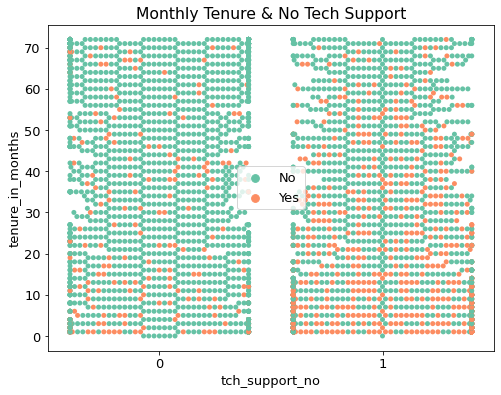

In [28]:
sns.swarmplot(x="tch_support_no", y="tenure_in_months", data=train, hue="churn", palette="Set2")
plt.legend()
plt.title('Monthly Tenure & No Tech Support')

------

<h4>Takeaways</h4>

- Not having tech support seems to support an observation that people will churn sooner. It could mean that having more extras (services) will lead to less churn.

-----


Text(0.5, 1.0, 'Monthly Tenure & On A Monthly Contract')

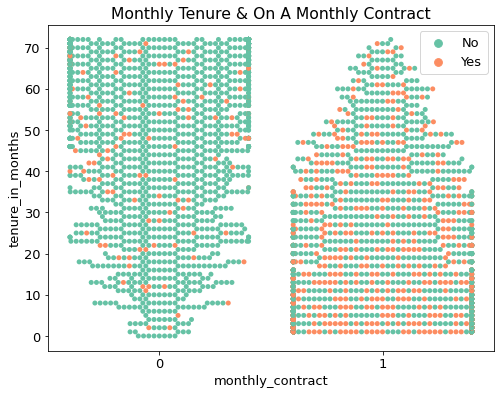

In [29]:
sns.swarmplot(x="monthly_contract", y="tenure_in_months", data=train, hue="churn", palette="Set2")
plt.legend()
plt.title('Monthly Tenure & On A Monthly Contract')

------

<h4>Takeaways</h4>

- Monthly contracts are strong signs that a customer will churn. The monthly contract offerings need to analzyed and adjusted to help retain this customer.

-----


<h3><b>Takeaways: </b></h3>

   - All of the swarm plots minus the first one(those with online security and back up) above lead me to believe there is definitley a relationship between those churning early and the features tested.
   
   - These need to be investigated further with some statistical testing.
    
-----

<h3><font color = 'green'>Let's analyze these features again where we believe there to be a relationship with churn</font></h3>

----

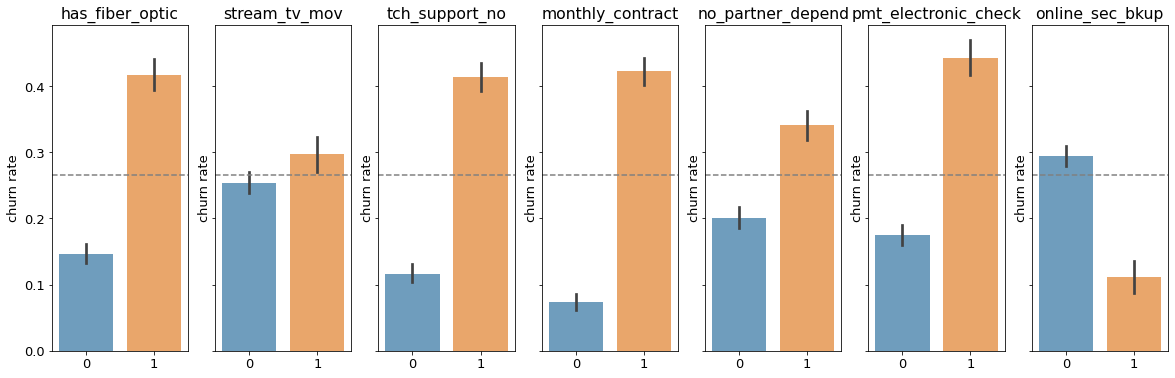

In [30]:
features = ['has_fiber_optic', 'stream_tv_mov', 'tch_support_no',  'monthly_contract',  'no_partner_depend', 'pmt_electronic_check', 'online_sec_bkup']

survival_rate = train.encoded_churn.mean()
_, ax = plt.subplots(nrows=1, ncols=7, figsize=(20, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'encoded_churn', data=train, ax=ax[i], alpha=0.7)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('churn rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='grey')

-------

<h3><font color = 'black'> Chi^2 Testing</font></h3>

 - The charts appear to show that there might be a relationship between the features shown and churn. A chi^2 test will help us analyze this further by comparing two categorical variables.
---------

Let's see if there is a relationship between churn and having fiber optic internet

- <b>Null Hypothesis:</b> Churn is not related to having fiber optic internet.
- <b>Alternative Hypothesis:</b> There is a relationship between churn and having fiber optic internet.

------

In [31]:
# cross tab churn vs having Fiber Optic Internet
observed = pd.crosstab(train.churn, train.has_fiber_optic)
observed

has_fiber_optic,0,1
churn,,
No,1881,1016
Yes,322,724


In [32]:
# Set our alpha
alpha = .05

In [33]:
# .chi2_contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [34]:
null_hypothesis = "Churn is independent of having fiber optic internet"

if p < alpha:
    
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(p)

We reject the hypothesis that Churn is independent of having fiber optic internet
1.0159095193215674e-80


-----

<h3> Takeaway:</h3>
   - The chi^2 test shows that there is a relatinship between churn and having fiber optic internet.
   
   -----

Let's see if there is a relationship between churn and having no tech support.
- <b>Null Hypothesis:</b> Churn is not related to having not having tech support.
- <b>Alternative Hypothesis:</b> There is a relationship between churn and having no tech support.

-------

In [35]:
# cross tab Churn vs Having No Tech Support
observed = pd.crosstab(train.churn, train.tch_support_no)
observed

tch_support_no,0,1
churn,,
No,1735,1162
Yes,229,817


In [36]:
# Set our alpha
alpha = .05

In [37]:
# .chi2_contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [38]:
null_hypothesis = "Churn is independent of having no tech support"

if p < alpha:
    
    print("We reject the null hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(p)

We reject the null hypothesis that Churn is independent of having no tech support
3.4118190180471985e-98


-----

<h3> Takeaway:</h3>
   - The chi^2 test shows that there is a relationship between churn and having no tech support.
   
   -----

Let's see if there is a relationship between churn and being on a monthly contract.
- <b>Null Hypothesis:</b> Churn is not related to being on a monthly contract.
- <b>Alternative Hypothesis:</b> There is a relationship between churn and being on a monthly contract.

----------

In [39]:
# cross tab churn vs being on a monthly contract
observed = pd.crosstab(train.churn, train.monthly_contract)
observed

monthly_contract,0,1
churn,,
No,1646,1251
Yes,131,915


In [40]:
# Set our alpha
alpha = .05

In [41]:
# .chi2_contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [42]:
null_hypothesis = "Churn is independent of being on a monthly contract"

if p < alpha:
    
    print("We reject the null hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(p)

We reject the null hypothesis that Churn is independent of being on a monthly contract
4.445064986857053e-134


-----

<h3> Takeaway:</h3>
   - The chi^2 test shows that there is a relationship between churn and being on a monthly contract.
   
   -----

Let's see if there is a relationship between churn and having no partners and no dependents (this was a new column that was created).
- <b>Null Hypothesis:</b> Churn is not related to whether a customer has no partner and no dependents.
- <b>Alternative Hypothesis:</b> There is a relationship between churn and having no partner and no dependents.

--------

In [43]:
# cross tab churn vs having no partner and no dependents
observed = pd.crosstab(train.churn, train.no_partner_depend)
observed

no_partner_depend,0,1
churn,,
No,1689,1208
Yes,422,624


In [44]:
# Set our alpha
alpha = .05

In [45]:
# .chi2_contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [46]:
null_hypothesis = "Churn is independent of having no partner and no dependents"

if p < alpha:
    
    print("We reject the null hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(p)

We reject the null hypothesis that Churn is independent of having no partner and no dependents
2.644454950536417e-23


-----

<h3> Takeaway:</h3>
   - The chi^2 test shows that there is a relationship between churn and having no partner and no dependents.
   
   -----



Let's see if there is a relationship between churn and paying with electronic check.
- <b>Null Hypothesis:</b> Churn is not related to paying with an electronic check.
- <b>Alternative Hypothesis:</b> There is a relationship between churn and paying with electronic check.

--------

In [47]:
# cross tab churn vs paying with electronic check
observed = pd.crosstab(train.churn, train.pmt_electronic_check)
observed

pmt_electronic_check,0,1
churn,,
No,2156,741
Yes,459,587


In [48]:
# Set our alpha
alpha = .05

In [49]:
# .chi2_contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [50]:
null_hypothesis = "Churn is independent of paying by electronic check"

if p < alpha:
    
    print("We reject the null hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(p)

We reject the null hypothesis that Churn is independent of paying by electronic check
1.818936987157837e-71


-----

<h3> Takeaway:</h3>
   - The chi^2 test shows that there is a relationship between churn and paying with electronic check.
   
   -----

In [51]:
def plot_violin_grid_with_color(train, target, cat_vars, quant_vars):
    cols = len(cat_vars)
    for quant in quant_vars:
        _, ax = plt.subplots(nrows=1, ncols=cols, figsize=(16, 4), sharey=True)
        for i, cat in enumerate(cat_vars):
            sns.violinplot(x=cat, y=quant, data=train, split=True, 
                           ax=ax[i], hue=target, palette="Set2")
            ax[i].set_xlabel('')
            ax[i].set_ylabel(quant)
            ax[i].set_title(cat)
        plt.show()

-------

<h3>Additional Visualizations</h3>

- Below are violin plots to help show the relationship between our categorical and quanitative variables. 

------

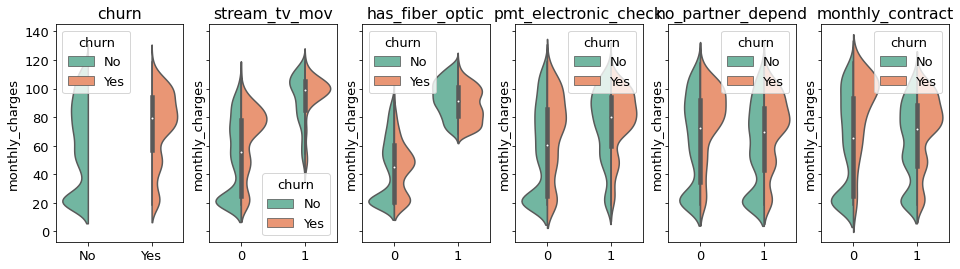

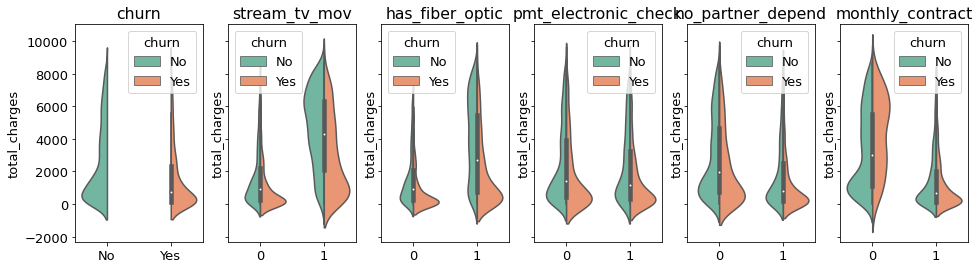

In [52]:
explore.plot_violin_grid_with_color(train, 'churn', cat_vars, quant_vars)

-----

<h3>Modeling & Evaluation </h3>

- Now that we have explored the data set, it's time use our models and identify (using features we believe are causing churn) which customers are most likely to churn

-----

In [53]:
# Seperate out our X and y values
X_train = train.drop(columns=["encoded_churn", "churn"])
y_train = train.encoded_churn

X_validate = validate.drop(columns=["encoded_churn", "churn"])
y_validate = validate.encoded_churn

X_test = test.drop(columns=["encoded_churn", "churn"])
y_test = test.encoded_churn

-----

<h3>Establish the Baseline</h3>

------

<h5>Before we can move forward and look at our models, a baseline accuracy needs to be established. This baseline will establish the floor of what the expectation of performance the model must at the very least meet.</h5>

------

In [54]:
# The most frequenly observed outcome will be our baseline

train.encoded_churn.value_counts()

0    2897
1    1046
Name: encoded_churn, dtype: int64

-----
<h5>Next, we will establish our baseline accuracy off the trained target variable 'encoded_churn'. Encoded just means that we have made 1 represent 'Yes' and 0 means 'No'.</h5>

----

In [55]:
baseline_accuracy = (round((train.encoded_churn == 0).mean(), 2)* 100)

print(f'Our baseline accuracy is {baseline_accuracy}%')

Our baseline accuracy is 73.0%


-------

<h3>Logistic Regression Model</h3>

--------

In [56]:
# Create the logistic regression
logit = LogisticRegression(random_state=123)

# specify the features we're using
features = ['has_fiber_optic', 'tch_support_no',  'monthly_contract',  'no_partner_depend', 'pmt_electronic_check', 'online_sec_bkup']

# Fit a model using only these specified features
# logit.fit(X_train[["age", "pclass", "fare"]], y_train)
logit.fit(X_train[features], y_train)

# Since we .fit on a subset, we .predict on that same subset of features
y_pred = logit.predict(X_train[features])

print("Baseline is", round(baseline_accuracy, 2))
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train[features], y_train)))

Baseline is 73.0
Accuracy of Logistic Regression classifier on training set: 0.78


In [57]:
# Let's determine logit1's metrics on validate
features = ['has_fiber_optic', 'tch_support_no',  'monthly_contract',  'no_partner_depend', 'pmt_electronic_check', 'online_sec_bkup']

y_pred = logit.predict(X_validate[features])

print('Logit1 model using fiber optic, no tech support, monthly contract, no partner or dependents, and electronic check pmt')
print(classification_report(y_validate, y_pred))

Logit1 model using fiber optic, no tech support, monthly contract, no partner or dependents, and electronic check pmt
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1242
           1       0.63      0.48      0.55       449

    accuracy                           0.79      1691
   macro avg       0.73      0.69      0.71      1691
weighted avg       0.78      0.79      0.78      1691



-----

<h3>Takeaways</h3>

- 6 different regression models were run using a different number of features each time based on a combination of the following:
    - features = ['has_fiber_optic', 'tch_support_no',  'monthly_contract',  'no_partner_depend', 'pmt_electronic_check', 'online_sec_bkup']

- I went with the first model that I did which had all of the above features included. This regression model came lock-in-step practically with the Random Forest model and could be suitable subsitute. 

- Hyper-parameters weren't really touched in this process and that could lead to better results down the line




-------

<h3>KNN Model</h3>

--------

In [58]:
# Now let's make the model
knn = KNeighborsClassifier()

In [59]:
features = ['has_fiber_optic', 'tch_support_no',  'monthly_contract',  'no_partner_depend', 'pmt_electronic_check', 'online_sec_bkup']


In [60]:
# Now let's train the model!
knn.fit(X_train[features], y_train)

KNeighborsClassifier()

In [61]:
# Let's check the accuracy
accuracy = knn.score(X_train[features], y_train)
print(f"accuracy is {accuracy:.3}")

accuracy is 0.729


In [62]:
# Evaluate the model
y_pred = knn.predict(X_train[features])

In [63]:
# Let's check our other classification metrics
# y_train is the actual labels for the target variable
# y_pred is the predictions that the model makes based off our X features
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83      2897
           1       0.48      0.28      0.35      1046

    accuracy                           0.73      3943
   macro avg       0.63      0.58      0.59      3943
weighted avg       0.70      0.73      0.70      3943



In [64]:
# Let's see how well this model performs on out of sample data!
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_validate[features], y_validate)))

Accuracy of KNN classifier on test set: 0.73


In [65]:
# Obtain the predictions from the model
y_pred = knn.predict(X_validate[features])

In [66]:
# Let's check our other classification metrics
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83      1242
           1       0.48      0.27      0.35       449

    accuracy                           0.73      1691
   macro avg       0.63      0.58      0.59      1691
weighted avg       0.70      0.73      0.70      1691



<h3>Takeaways</h3>

- KNN really had trouble and could only muster 73% accuracy which was met the baseline. This model won't be a choice moving forward with this dataset.
- Some issues that could have been behind the poor accuracy are that I may have had some irrelvant features that muddied up the process
    - Data may need to be scaled as well

-------

<h3>Random Forest</h3>

--------

In [67]:
features = ['has_fiber_optic', 'tch_support_no',  'monthly_contract',  'no_partner_depend', 'pmt_electronic_check', 'online_sec_bkup']


In [68]:
def get_metrics_binary(rf):
    '''
    get_metrics_binary takes in a confusion matrix (cnf) for a binary classifier and prints out metrics based on
    values in variables named X_train, y_train, and y_pred.
    
    return: a classification report as a transposed DataFrame
    '''
    accuracy = rf.score(X_train[features], y_train)
    class_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).T
    conf = confusion_matrix(y_train, y_pred)
    tpr = conf[1][1] / conf[1].sum()
    fpr = conf[0][1] / conf[0].sum()
    tnr = conf[0][0] / conf[0].sum()
    fnr = conf[1][0] / conf[1].sum()
    print(f'''
    The accuracy for our model is {accuracy:.4}
    The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
    The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
    ''')
    return class_report

In [69]:
# create the Random Forest Model
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)

In [70]:
rf.fit(X_train[features], y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [71]:
y_pred = rf.predict(X_train[features])

In [72]:
y_pred_proba = rf.predict_proba(X_train[features])

In [73]:
class_report = get_metrics_binary(rf)
class_report


    The accuracy for our model is 0.7801
    The True Positive Rate is 0.478, The False Positive Rate is 0.111,
    The True Negative Rate is 0.889, and the False Negative Rate is 0.522
    


,precision,recall,f1-score,support
0,0.825112,0.889196,0.855956,2897.000000
1,0.609013,0.478011,0.535619,1046.000000
accuracy,0.780117,0.780117,0.780117,0.780117
macro avg,0.717063,0.683604,0.695787,3943.000000
weighted avg,0.767785,0.780117,0.770977,3943.000000


In [74]:
print('Accuracy: {:.2f}'.format(rf.score(X_validate[features], y_validate)))

y_pred = rf.predict(X_validate[features])



print(classification_report(y_validate, y_pred))



Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1242
           1       0.63      0.49      0.55       449

    accuracy                           0.79      1691
   macro avg       0.73      0.69      0.70      1691
weighted avg       0.77      0.79      0.78      1691



--------

<h3>Takeaways</h3>

- Random Forest performed better than baseline on the train data.
- When put up against the validate section, it increased its accuracy by almost a percentage point.


-------

<h3>Decision Tree</h3>

--------

In [75]:
# Let's generate a blank, new Decision Tree model
# Be sure to set the max_depth argument
# clf = DecisionTreeClassifier(max_depth=3, random_state=123)

clf = DecisionTreeClassifier(max_depth=6, random_state=123)


In [76]:
# Now let's train our model on the training data
# fitting == training the model
clf = clf.fit(X_train, y_train)
clf

DecisionTreeClassifier(max_depth=6, random_state=123)

In [77]:
# Visualize the model so it can explain itself!

dot_data = export_graphviz(clf, feature_names= X_train.columns,rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('telco_decision_tree', view=True, format="pdf")

'telco_decision_tree.pdf'

In [78]:
# Now we'll make a set of predictions using this trained model
y_pred = clf.predict(X_train)


In [79]:
# Estimate the probabilities for each class
y_pred_proba = clf.predict_proba(X_train)


In [80]:
# Let's evaluate the model
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.81


In [81]:
class_report = classification_report(y_train, y_pred, output_dict=True)
pd.DataFrame(class_report).T

,precision,recall,f1-score,support
0,0.859085,0.894373,0.876374,2897.000000
1,0.669903,0.593690,0.629498,1046.000000
accuracy,0.814608,0.814608,0.814608,0.814608
macro avg,0.764494,0.744032,0.752936,3943.000000
weighted avg,0.808899,0.814608,0.810883,3943.000000


In [82]:
y_pred = clf.predict(X_validate)

In [83]:
# Compare actual y values from validate to predictions based on X_validate
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1242
           1       0.62      0.56      0.59       449

    accuracy                           0.79      1691
   macro avg       0.74      0.72      0.73      1691
weighted avg       0.79      0.79      0.79      1691



-------

<h3>Takeaways</h3>

- I had an issue with this model. I was not able to get it to run on the specific features like I did for the Random Forest, Logistic Regression, and KNN. 

- Please note that this model was tested on all features within the train dataset. This will need to be adjusted.

- With that said, the top two features it began with are in our features list. 
    - monthly_contract (top feature)
    - has_fiber_optic (2nd feature used for splitting)

- This model wasn't too over fit and it peformed at 81% on the train data and 79% on the validate data.

-------

<h3>Comparitive Look At Train & Validate Accuracy</h3>

-----

In [93]:

logreg_train_accuracy = logit.score(X_train[features], y_train)
decisiontree_train_accuracy = clf.score(X_train, y_train)
random_forest_train_accuracy = rf.score(X_train[features], y_train)
knn_train_accuracy = knn.score(X_train[features], y_train)

logreg_validate_accuracy = logit.score(X_validate[features], y_validate)
decisiontree_validate_accuracy = clf.score(X_validate, y_validate)
random_forest_validate_accuracy = rf.score(X_validate[features], y_validate)
knn_validate_accuracy = knn.score(X_validate[features], y_validate)
print('\n')
print(f'The baseline accuracy is {baseline_accuracy}%')
print('\n')

print(f"Logistic Regression Train Accuracy --- {logreg_train_accuracy:.2%}")
print(f"Decision Tree Train Accuracy --- {decisiontree_train_accuracy:.2%}")
print(f"Random Forest Train Accuracy --- {random_forest_train_accuracy:.2%}")
print(f"KNN Accuracy Train Accuracy --- {knn_train_accuracy:.2%}")
print('\n')
print(f"Logistic Regression Validate Accuracy --- {logreg_validate_accuracy:.2%}")
print(f"Decision Tree Validate Accuracy --- {decisiontree_validate_accuracy:.2%}")
print(f"Random Forest Validate Accuracy --- {random_forest_validate_accuracy:.2%}")
print(f"KNN Validate Accuracy --- {knn_validate_accuracy:.2%}")



The baseline accuracy is 73.0%


Logistic Regression Train Accuracy --- 77.88%
Decision Tree Train Accuracy --- 81.46%
Random Forest Train Accuracy --- 78.01%
KNN Accuracy Train Accuracy --- 72.86%


Logistic Regression Validate Accuracy --- 78.89%
Decision Tree Validate Accuracy --- 79.42%
Random Forest Validate Accuracy --- 78.65%
KNN Validate Accuracy --- 72.92%


------

<h3>Test Accuracy</h3>

- I chose to move forward with the Random Forest model as it performed the same as logistic regression but had a slightly higher F1 score.

- Logistic Regression would have been a fine model to move forward with too.

- After testing Random Forest, it performed with a 77.36% accuracy on the test data. This beat the baseline of 73% established earlier.

-----

In [85]:
random_forest_test_accuracy = rf.score(X_test[features], y_test)
print(f"Random Forest Accuracy --- {random_forest_test_accuracy:.2%}")

Random Forest Accuracy --- 77.36%


--------

<h3>Key Takeaways, Recommendations, & Next Steps</h3>

Through this classification project I came away with the following <b> key takeways</b>:

- There is no one main driver churn and it appears a number of elements go into a customer churning out within 5 months

- The customers who are leaving are mainly month to month contract holder who have no partner or dependents
    - they can cut the cord much easier when they only have to convince themselves to leave
    
- Paying by electronic check is indicator that customer might churn when paired with other features

- A customer having fiber optic internet appears to be a strong indicator of churn but having fiber optic doesn't make a person want to leave the company, it just means they don't want slow internet so this feature should be paired with others

<b>Recommendations & next steps</b>:

- A feature I would have liked to create would be a column based on the number of services a customer has. I believe that the more services a person has, the less likely will leave based on the fact that nobody signs up for all the bells and whistle just so they can leave 5 months later and have to go through the whole process again.


- I believe an age column would be helpful to further determine churn and help marketing target that subset

- Another column of information that could be helpful is area of residence to see if perhaps there is a concentration of where churn is occuring
-----



<h3>Create CSV File</h3>

-----

In [86]:
from model import run_model

<h5>To create a CSV file with customer_id, probability of churn, and prediction of churn run the code below</h5>

In [87]:
run_model()

,Customer_ID,Actual_Churn,Model_Predictions,Model_Probabilities
3160,3420-YJLQT,No,Yes,0.680425
1592,6543-JXSOO,No,No,0.033254
5824,5577-OTWWW,Yes,No,0.254862
3866,6646-JPPHA,No,No,0.306911
714,5759-RCVCB,Yes,No,0.437517
...,...,...,...,...
924,7579-OOPEC,Yes,No,0.284631
5052,9360-AHGNL,Yes,No,0.088731
6243,5774-QPLTF,No,No,0.005512
2250,7340-KEFQE,No,No,0.005512
